In [31]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
from IPython.display import HTML
import matplotlib.animation as animation

In [2]:
def build_K(N, d, mean, cv):
    '''
    Builds connectivity matrix K for Kuramoto lattice.
    N : number of oscillators. Needs to be a number that makes a square lattice, e.g., 4, 9, 16, 25, 32, etc.
    '''
    K = np.zeros((N, N))
    xN = int(np.sqrt(N))
    for i in np.arange(N):
        irow, icol = (int(i/xN), int(i%xN))
        topLeft = (irow-d, icol-d)
        for ii in np.arange(d*2+1):   # go through the whole dxd square surrounding neuron i.
            for jj in np.arange(d*2+1):
                row = (topLeft[0]+ii)
                col = (topLeft[1]+jj)
                if ( row >= 0 ) and ( row < xN ) and ( col >= 0 ) and ( col < xN ):
                    indx = int( row*xN + col )
                    K[i, indx] = np.abs( np.random.normal(mean, mean*cv) )
    K *= np.logical_not(np.identity(N)).astype(int)
    return K

In [3]:
N = 400  # number of oscillators
f = 2   # intrinsic frequency (Hz)
W = np.ones(N) * 2*np.pi*f
K = build_K(N, 1, 0.2, 0.1)   # coupling strengths
f = lambda y, t : W + np.sum( K * np.sin( np.tile(y, (N,1)).T - np.tile(y, (N,1)) ), axis=0 )# Kuramoto model

init_thetas = 2*np.pi * np.random.random(size=N)
time = np.arange(0,10,1e-3)
results = odeint(f, init_thetas, time).T

'''plt.figure(figsize=(15,4), dpi=600)
plt.plot(np.sin(results.T), linewidth=2)
plt.xlabel('time (s)', fontsize=22)
plt.ylabel('sin(θ)', fontsize=22)
plt.xticks(np.linspace(0,1e5,6), np.linspace(0,10,6, dtype=int), fontsize=20)
plt.yticks(np.linspace(-1,1,5), np.linspace(-1,1,5), fontsize=20)
sns.despine()
plt.show()'''

"plt.figure(figsize=(15,4), dpi=600)\nplt.plot(np.sin(results.T), linewidth=2)\nplt.xlabel('time (s)', fontsize=22)\nplt.ylabel('sin(θ)', fontsize=22)\nplt.xticks(np.linspace(0,1e5,6), np.linspace(0,10,6, dtype=int), fontsize=20)\nplt.yticks(np.linspace(-1,1,5), np.linspace(-1,1,5), fontsize=20)\nsns.despine()\nplt.show()"

In [4]:
phase = np.sin(results.T)
phase = phase.T.reshape((int(np.sqrt(N)), int(np.sqrt(N)), time.shape[0]))

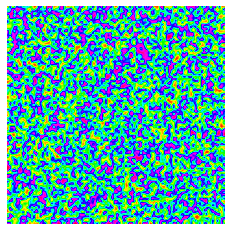

In [29]:
data = np.copy(phase)

fig, ax = plt.subplots()

ax.axis('off')

im = ax.imshow(data[:,:,0], vmin=-1, vmax=1, interpolation='gaussian', cmap='hsv')
# cmaps : viridis, hsv, hot, rainbow, jet, turbo

def init():
    im.set_data(data[:,:,0])
    return (im,)

# animation function. This is called sequentially
def animate(i):
    data_slice = data[:,:,i]
    im.set_data(data_slice)
    return (im,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=time.shape[0], interval=1, blit=True)

In [30]:
anim.save('kuramoto_lattice.mp4', dpi=600)

In [7]:
HTML(anim.to_html5_video())

Animation movie is 29630456 bytes, exceeding the limit of 20971520.0. If you're sure you want a large animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB).


<IPython.core.display.Javascript object>


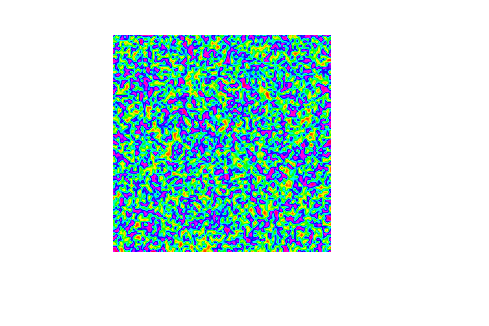

KeyboardInterrupt: 

In [32]:
phi = 2*np.pi * np.random.random(size=N)

fig, ax = plt.subplots()
ax.axis('off')
img = ax.imshow(np.sin(phi).reshape((int(np.sqrt(N)), int(np.sqrt(N)))), 
                vmin=-1, vmax=1, interpolation='gaussian', cmap='hsv')
fig.canvas.draw()
plt.show(block=False)

dt = 1e-3
T = 10 # s
time = np.arange(0,T,dt)
for t in time:
    phi += f(phi, t)*dt
    data = np.sin(phi).reshape((int(np.sqrt(N)), int(np.sqrt(N))))
    try:
        img.set_data(data)
        fig.canvas.draw()
        plt.pause(0.001)
    except KeyboardInterrupt:
        plt.close('all')
        break